In [1]:
from copy import deepcopy

In [2]:
from CS_Simulation.Scientist import scientist

In [3]:
scientist1 = scientist("random",196,10,1)

In [4]:
from CS_Simulation.utils import CA

In [5]:
from CS_Simulation.utils import DataGen

In [6]:
pp = {}
system = CA()

pp['side_length'] = 14
pp['rule']={'alive': [2, 3], 'dead': [3]}
system.assign_pp(pp)

In [7]:
single_data_size = 5000
total_data_size = single_data_size * 1
batch_size = 16
train_ratio = 0.8
filename = ''

In [8]:
for i in range(4000):
    scientist1.make_observation(system)

In [9]:
scientist1.initialize_explanation()

In [11]:
scientist1.update_explanation(5e-4,0.005,15)

============== Epoch 0 =============
<generator object Module.parameters at 0x7fa410340040>
[Epoch 0] Train Loss : 0.5815013329982758 / Train Acc : 72.53368055555556
<generator object Module.parameters at 0x7fa38f1da340>
[Epoch 1] Train Loss : 0.5734922461509705 / Train Acc : 72.70399305555556
<generator object Module.parameters at 0x7fa410340040>
[Epoch 2] Train Loss : 0.540155577301979 / Train Acc : 73.9328125
<generator object Module.parameters at 0x7fa38f1db5a0>
[Epoch 3] Train Loss : 0.4047566534280777 / Train Acc : 80.03159722222222
<generator object Module.parameters at 0x7fa410340040>
[Epoch 4] Train Loss : 0.2545932983756065 / Train Acc : 88.03871527777778
<generator object Module.parameters at 0x7fa410340040>
[Epoch 5] Train Loss : 0.14263918992877006 / Train Acc : 93.90399305555556
<generator object Module.parameters at 0x7fa38f1da960>
[Epoch 6] Train Loss : 0.08553608544170857 / Train Acc : 96.5421875
<generator object Module.parameters at 0x7fa408a20d60>
[Epoch 7] Train Lo

In [12]:
import numpy as np

In [13]:
test_state = np.zeros((196,3))

In [14]:
for i in range(14):
    for j in range(14):
        test_state[i*14+j][0] = i 
        test_state[i*14+j][1] = j
        if i==2 &j==3:
            test_state[i*14+j][2]  = 1

In [15]:
import torch

In [16]:
key_temp = scientist1.explanation.module.key(torch.tensor(test_state).float().to("cuda:6"))

In [17]:
test_state = torch.tensor(test_state).to("cuda:6")

In [18]:
que_temp = scientist1.explanation.module.query(test_state.float())

In [19]:
kz = [key_temp for _ in range(key_temp.shape[1])]

In [20]:
mask_const = 10000
        
mask = torch.zeros(test_state.unsqueeze(0).shape[0], test_state.unsqueeze(0).shape[1], test_state.unsqueeze(0).shape[1]).to(test_state.device)
mask = mask+torch.eye(test_state.unsqueeze(0).shape[1], test_state.unsqueeze(0).shape[1]).to(test_state.device)*mask_const

In [21]:
mask

tensor([[[10000.,     0.,     0.,  ...,     0.,     0.,     0.],
         [    0., 10000.,     0.,  ...,     0.,     0.,     0.],
         [    0.,     0., 10000.,  ...,     0.,     0.,     0.],
         ...,
         [    0.,     0.,     0.,  ..., 10000.,     0.,     0.],
         [    0.,     0.,     0.,  ...,     0., 10000.,     0.],
         [    0.,     0.,     0.,  ...,     0.,     0., 10000.]]],
       device='cuda:6')

In [22]:
ky = key_temp.unsqueeze(0)[:, :, 10* 0:10 * (0 + 1)]
                
kz = [ky for _ in range(ky.shape[1])]

qy = que_temp.unsqueeze(0)[:, :, 10 * 0: 10 * (0+ 1)]
                
    
qz = [qy for _ in range(qy.shape[1])]
                
z = torch.cat((torch.stack(kz, dim=-2), torch.stack(qz, dim=-3)), -1)
               

In [23]:
w = torch.sigmoid(torch.add(scientist1.explanation.module.att(z).squeeze(-1), -mask))

In [24]:
import matplotlib.pyplot as plt

In [25]:
w.shape

torch.Size([1, 196, 196])

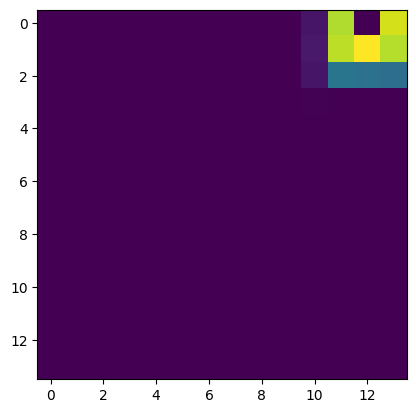

In [26]:
plt.imshow(w[0][12].reshape((14,14)).detach().cpu().numpy())

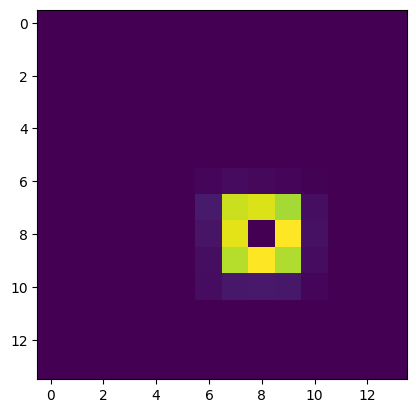

In [27]:
plt.imshow(w[0][120].reshape((14,14)).detach().cpu().numpy())